In [58]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'1BM19IS066 (1).docx'
 1BM19IS066.docx
 1bm19is066_kpremkumarappcie3.pdf
 1Bm19is066_mlgcie3.pdf
'1BM19IS066(OUTPUT1_LAB)) (1).docx'
'1BM19IS066(OUTPUT1_LAB)).docx'
'2nd year'
'3rd sem'
 5sem
'6th sem'
 Admission_Predict_Ver1.1.csv
'Artificial Intelligence Rich and Knight, Shivshankar Nair (1).gdoc'
'Artificial Intelligence Rich and Knight, Shivshankar Nair.gdoc'
 Attendance.gsheet
 bda_presentation.pdf
 birthday
'Blank Quiz.gform'
'blink it.gsheet'
 certificates
 CGR_aat_topics_A_B_Section.gsheet
 CIE-2_CN2-Set1_scheme.docx.gdoc
 Classroom
'CLC PRESENTATION.gslides'
'Cloud research papers'
 cn2.gslides
'CN2-Lab manaul (1).gdoc'
'cn_lab2 (1).pdf'
 cnlab2.pkt
'Cns Project.gslides'
'Colab Notebooks'
'Copy of KUBERNETES.gslides'
'Copy of software testing.gsheet'
'Course Evaluation (1).gform'
'Course Evaluation.gform'
'Course Evaluation (Responses).gsheet'
'Cryptography-and-network-security-principles-and-practice (1) (1).gdoc'
'Cryptography-and-network-security-principles-and-practice (1)

In [60]:
#  import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split


In [61]:
# Listing directory
!ls "/content/drive/My Drive/dl project"

 buildings   download.jpg  'Intel Image Dataset'   mountain
 data	     image.h5	    intel_image.h5	   untitled


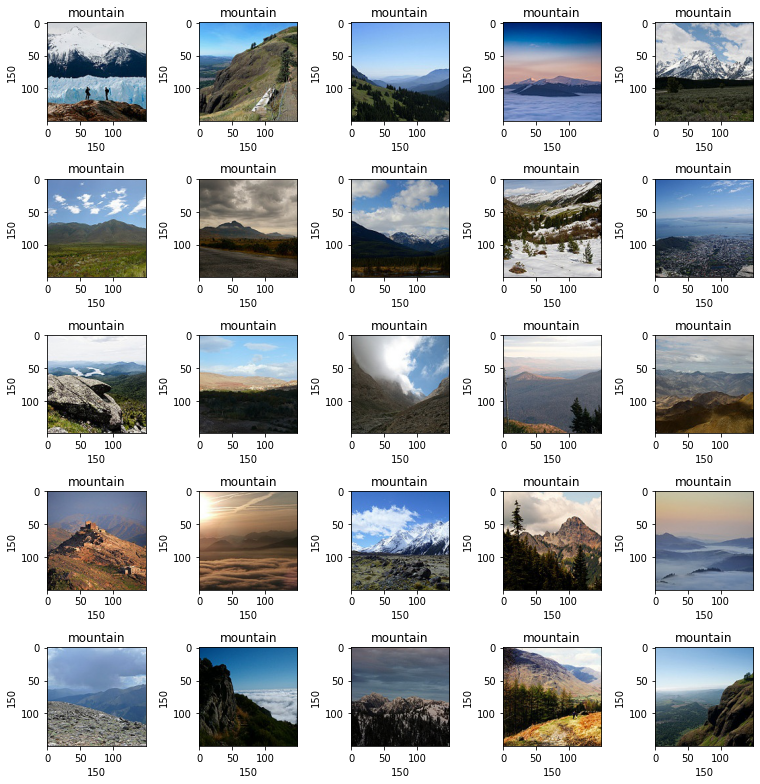

In [62]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "/content/drive/My Drive/dl project/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [63]:
# Setting root directory path and creating empty list
dir = "/content/drive/My Drive/dl project/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

Setting the root directory for the dataset and storing all the folders name of the dataset. We will also create 2 empty list for image and lables.

In [ ]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) 
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Next we need to resize images as some of the images don't have same dimensions. So, we will read and resize all the images. Then we will convert it into array and appending the list created above with the image and its label.

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

Checking for images per class.

In [ ]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

Storing the number of classes which will be used further in model architecture.

In [ ]:
# Checking x data shape
np.array(image_list).shape

Check the shape of the x data for input layer of model architecture.

In [ ]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

Checking the number of labels in y data which should be equal to total number of images.

In [ ]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now we will split our dataset into testing and training using train_test_split() from sklearn.

In [ ]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

Next we will normalize the images by dividing them with 255 and we will also reshape x_train and x_test data. 

In [ ]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [ ]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Now we will create a network architecture for the model.
 We have used different types of layers according to their features namely BatchNormalization (Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch), 
 LeakyRelu (The Leaky ReLU modifies the function to allow small negative values when the input is less than zero),
  Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), 
  max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize),
   flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). 
  In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [ ]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics. Here we will use loss as categorical_crossentropy, optimizer as Adam and metrics as accuracy.

In [ ]:
# Training the model
epochs = 30
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 70 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [ ]:
# Saving model
model.save("/content/drive/My Drive/intel_image.h5")

We will save the model using model.save() to use it later for prediction.

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.



In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the loss of the model for the training history.



In [ ]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Evaluating the model to know the accuracy of the model on the test data.

In [ ]:
# Storing model predictions
y_pred = model.predict(x_test)

Generating predictions for test data and storing them into y_pred.

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[99])
img

Visualizing an image to be predicted in further steps.

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[99])])
print("Predicted : ",labels[np.argmax(y_pred[99])])